In [2]:
#connect drive
from google.colab import  drive 
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
#unzipping folders
!unrar x "/content/drive/MyDrive/data1.rar" "/content/data/"

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#for normalization + probability density function computation
from scipy import stats

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [5]:
df=pd.read_csv("data/data.csv",delimiter=";")
df

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [6]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [7]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
dtype: object

In [8]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [9]:
df.dropna(inplace=True)
print(df.isnull().sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64


In [19]:
corrmat=df.corr()

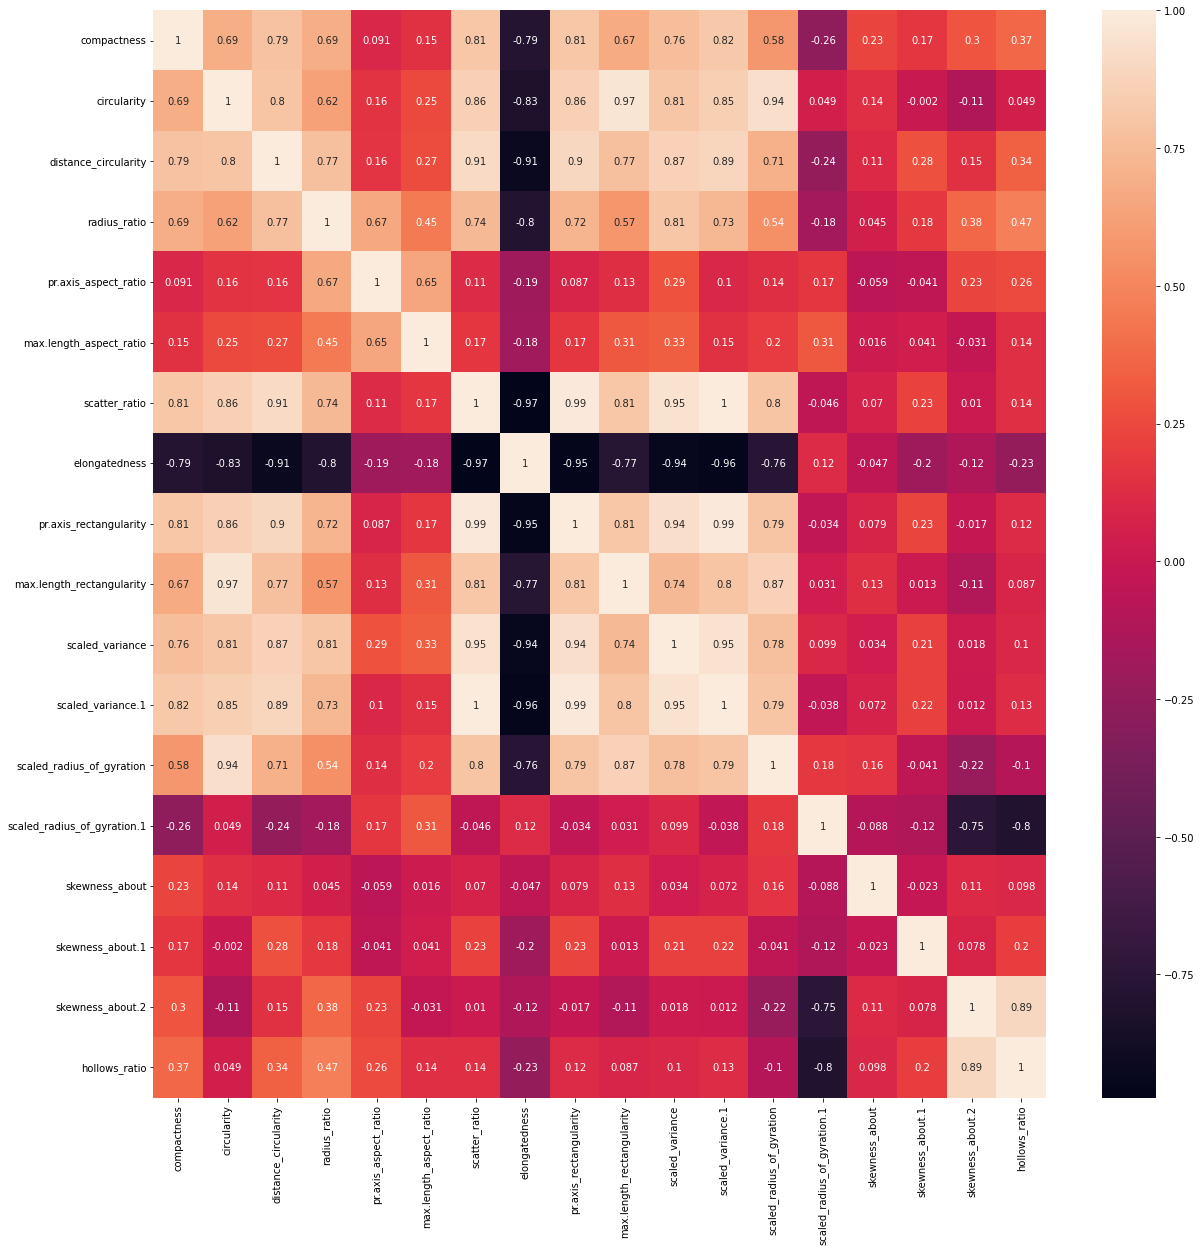

In [21]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [23]:
#elongatedness column shold me remove because of very similar others
df.drop(['elongatedness'], axis=1,inplace=True)
print(df.shape[1])

17


In [24]:
df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689885              0.789955   
circularity                     0.689885     1.000000              0.797704   
distance_circularity            0.789955     0.797704              1.000000   
radius_ratio                    0.688130     0.623950              0.771404   
pr.axis_aspect_ratio            0.090557     0.155023              0.163386   
max.length_aspect_ratio         0.150369     0.251619              0.265591   
scatter_ratio                   0.814026     0.858149              0.909023   
pr.axis_rectangularity          0.814227     0.856137              0.897261   
max.length_rectangularity       0.674902     0.965366              0.773459   
scaled_variance                 0.764386     0.806108              0.865683   
scaled_variance.1               0.820240     0.850932              0.891789   
scaled_radius_of_gyration       0.581405     0.935594              0.705689   
scaled_radius_of_gyration.1    -0.258437     0.049070             -0.238145   
skewness_about                  0.231648     0.141726              0.110280   
skewness_about.1                0.168384    -0.001975              0.277851   
skewness_about.2                0.296195    -0.113902              0.145258   
hollows_ratio                   0.372806     0.049331              0.343228   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.688130              0.090557   
circularity                      0.623950              0.155023   
distance_circularity             0.771404              0.163386   
radius_ratio                     1.000000              0.667375   
pr.axis_aspect_ratio             0.667375              1.000000   
max.length_aspect_ratio          0.452460              0.652093   
scatter_ratio                    0.743470              0.113696   
pr.axis_rectangularity           0.716210              0.086992   
max.length_rectangularity        0.570478              0.133553   
scaled_variance                  0.806788              0.290375   
scaled_variance.1                0.731773              0.100668   
scaled_radius_of_gyration        0.544636              0.135663   
scaled_radius_of_gyration.1     -0.175348              0.173060   
skewness_about                   0.044693             -0.059244   
skewness_about.1                 0.178079             -0.040769   
skewness_about.2                 0.375591              0.229702   
hollows_ratio                    0.470895              0.257566   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.150369       0.814026   
circularity                                 0.251619       0.858149   
distance_circularity                        0.265591       0.909023   
radius_ratio                                0.452460       0.743470   
pr.axis_aspect_ratio                        0.652093       0.113696   
max.length_aspect_ratio                     1.000000       0.171445   
scatter_ratio                               0.171445       1.000000   
pr.axis_rectangularity                      0.167514       0.991992   
max.length_rectangularity                   0.309180       0.808154   
scaled_variance                             0.331124       0.950067   
scaled_variance.1                           0.150069       0.996396   
scaled_radius_of_gyration                   0.197179       0.795748   
scaled_radius_of_gyration.1                 0.308329      -0.045632   
skewness_about                              0.016461       0.070118   
skewness_about.1                            0.041210       0.227375   
skewness_about.2                           -0.030543       0.009967   
hollows_ratio                               0.139283       0.138424   

                             pr.axis_rectangularity  \
compactness                                0.814227   
circularit

In [12]:
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(df)

# KMEANS

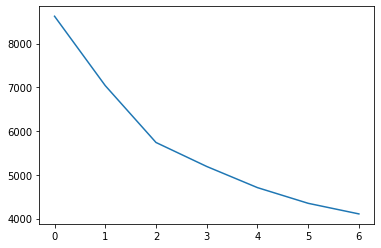

In [13]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [37]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3)

In [46]:
labels=kmeans.labels_
labels

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

In [47]:
score = silhouette_score(df, labels)
print(f'Silhouette score of kmeans: {score:.3f}')

Silhouette score of kmeans: 0.277


In [39]:
df2=df
df2['class'] = kmeans.labels_
df2['class'].value_counts()

0    313
1    260
2    240
Name: class, dtype: int64

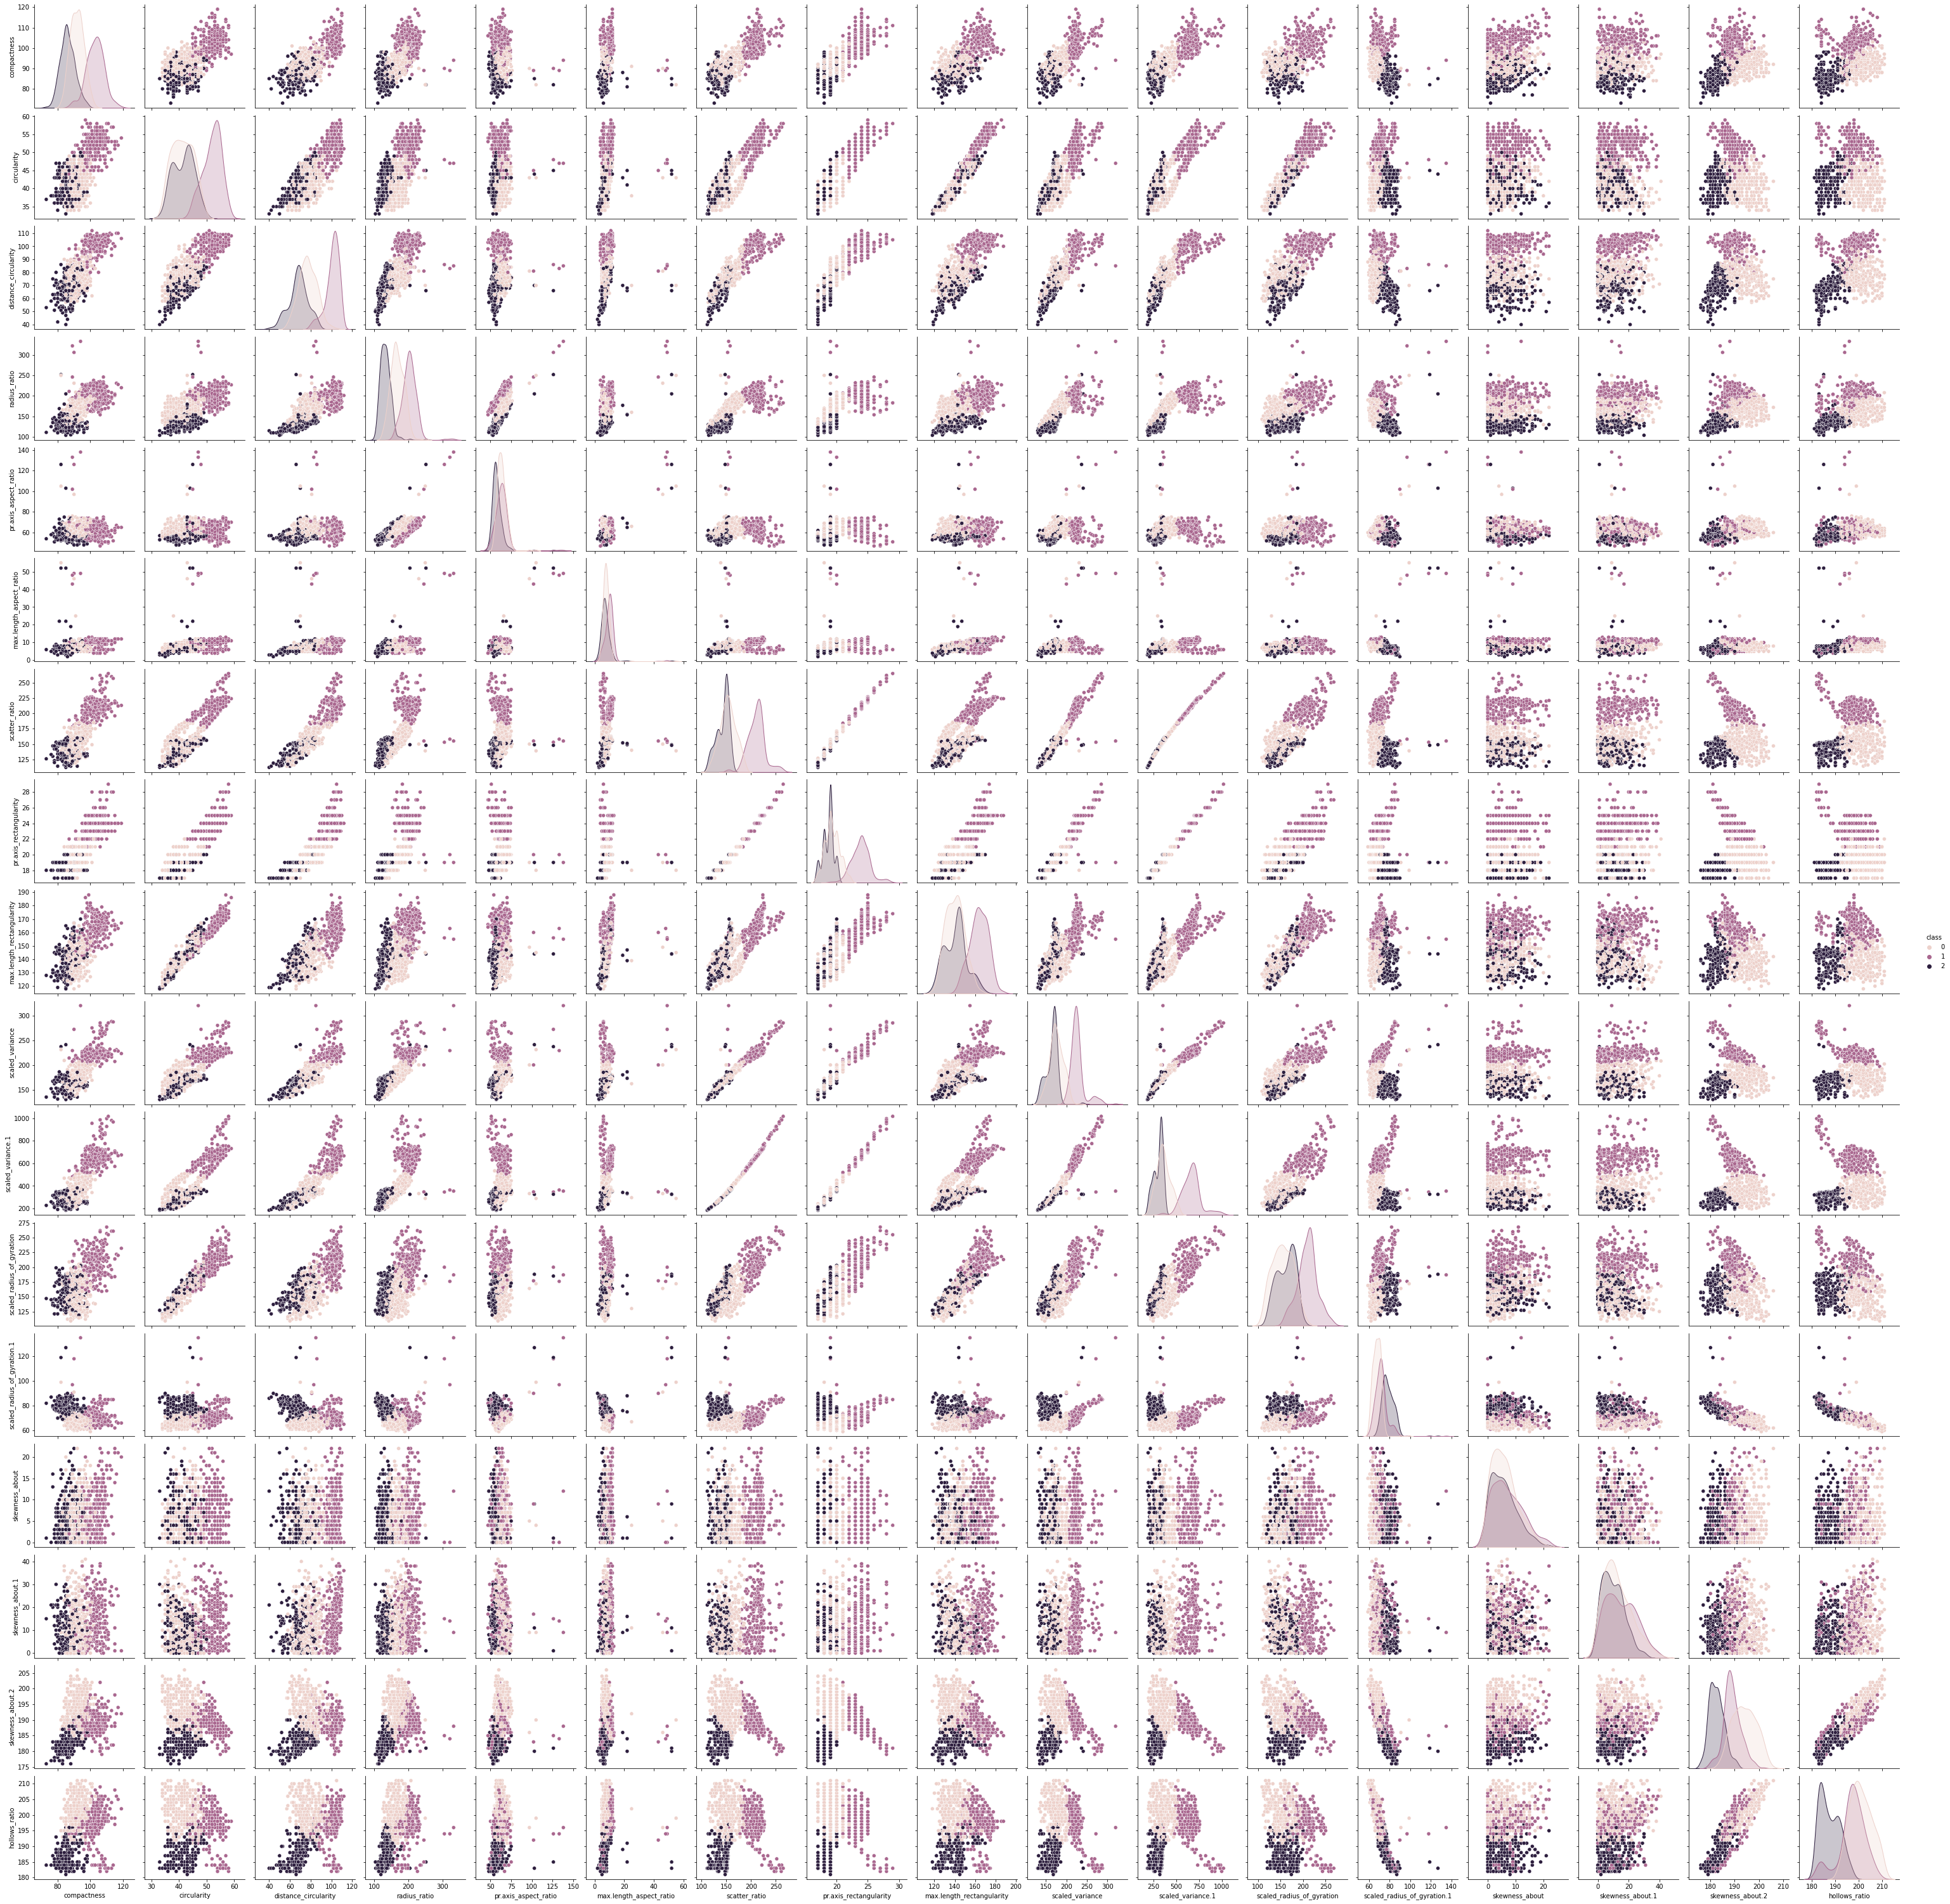

In [40]:
sns.pairplot(df2,hue = 'class')

# Hierarchical Clustering

In [43]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_res=cluster.fit_predict(rfm_df_scaled)
agg_res

array([1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 0,
       1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 3, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2,
       1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0,
       1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0,
       2, 2, 0, 2, 3, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 3, 1, 1, 2, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 1,
       0, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2,
       1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1,
       1, 0, 2, 1, 3, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2,

In [48]:
score = silhouette_score(df, agg_res)
print(f'Silhouette score of kmeans: {score:.3f}')

Silhouette score of kmeans: 0.276


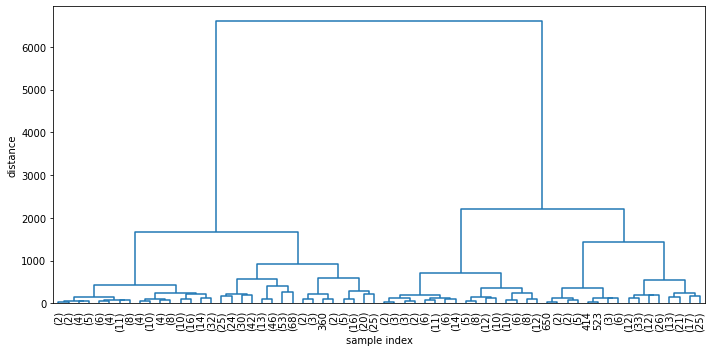

In [41]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(10,5))
plt.xlabel('sample index')
plt.ylabel('distance')
z = linkage(df,method='ward')
dendrogram(z,leaf_rotation=90,p = 5,color_threshold=10,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

# OPTİCS (Density Model)

In [17]:
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler

In [54]:
# Building the OPTICS Clustering model
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)
#X_normalized = normalize(rfm_df_scaled)
# Training the model
a=optics_model.fit(rfm_df_scaled)
labels=a.labels_

In [51]:
score = silhouette_score(df, labels)
print(f'Silhouette score of kmeans: {score:.3f}')

Silhouette score of kmeans: -0.218


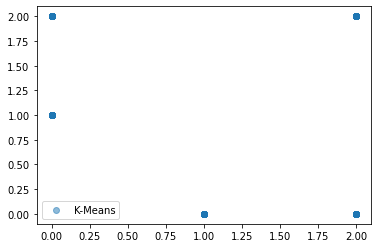

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Generate synthetic data with three distinct clusters
data=df

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(data)
kmeans_labels = kmeans.labels_

# Perform Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3).fit(data)
agg_labels = agg.labels_

# Perform Optics clustering
optics = DBSCAN(min_samples=5).fit(data)
optics_labels = optics.labels_

# Create a figure and subplot
fig, ax = plt.subplots()

# Overlay the data points colored by the K-means labels
ax.scatter(agg_labels, kmeans_labels, cmap='viridis', alpha=0.5, label='K-Means')

# Overlay the data points colored by the Agglomerative labels
#ax.scatter(data, agg_labels, cmap='viridis', alpha=0.5, label='Agglomerative')

# Overlay the data points colored by the Optics labels
#ax.scatter(data[:, 0], data[:, 1], c=optics_labels, cmap='viridis', alpha=0.5, label='Optics')

# Add a legend and show the plot
ax.legend()
plt.show()


# REPORT
First of all, I read and analyzed my dataset. I visualized it with some charts for review. Then I checked for null values ​​and deleted those values. I examined the types of the columns, they were all numeric and did not need to be changed. Then I examined the heatmap and correlations. I deleted some of the columns that were very related to each other. Then I clustered the dataset in three different models. These became the Kmeans, Agglomerative and Optics model. I examined the cluster labels that came out. These algorithms are already algorithms that work in different ways, so I didn't expect them to be labeled the same way, and it did. I also looked at the silhouette scores of each algorithm.